In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
from scipy import stats
import folium
from folium.plugins import HeatMap
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker

In [5]:
df = pd.read_csv('data/bike_checkout_processed_features.csv')

In [6]:
df.set_index('timestamp_hour', inplace=True)

In [7]:
df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
df.head()

,station_id,num_bikes_available_mean,mechanical_available,ebike_available,num_docks_available_mean,num_docks_available_max,is_charging_station,status,is_installed,is_renting,...,checkouts_hour_station,temperature,precipitation,wind_speed,weather_category,day_of_week,hour_of_day,month,checkouts_hour_station_lag1,checkouts_hour_station_lag24
timestamp_hour,,,,,,,,,,,,,,,,,,,,,
2024-07-31 21:00:00,24.0,18.0,13.0,5.0,17.0,17.0,True,IN_SERVICE,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN
2024-07-31 21:00:00,26.0,7.0,5.0,2.0,9.0,9.0,True,IN_SERVICE,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN
2024-07-31 21:00:00,29.0,3.0,0.0,3.0,9.0,9.0,True,IN_SERVICE,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN
2024-07-31 21:00:00,41.0,20.0,19.0,1.0,3.0,3.0,True,IN_SERVICE,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN
2024-07-31 21:00:00,42.0,3.0,0.0,3.0,9.0,9.0,True,IN_SERVICE,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217208 entries, 2024-07-31 21:00:00 to 2025-01-31 23:00:00
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   station_id                    217208 non-null  float64
 1   num_bikes_available_mean      217208 non-null  float64
 2   mechanical_available          217208 non-null  float64
 3   ebike_available               217208 non-null  float64
 4   num_docks_available_mean      217208 non-null  float64
 5   num_docks_available_max       217208 non-null  float64
 6   is_charging_station           217208 non-null  bool   
 7   status                        217208 non-null  object 
 8   is_installed                  217208 non-null  float64
 9   is_renting                    217208 non-null  float64
 10  is_returning                  217208 non-null  float64
 11  ttl                           217208 non-null  float64
 12  checkouts_hour_sta

In [10]:
# Apply log1p transformation (log(1+x)) to handle zeros
df['log_checkouts'] = np.log1p(df['checkouts_hour_station'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217208 entries, 2024-07-31 21:00:00 to 2025-01-31 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   station_id                    217208 non-null  float64
 1   num_bikes_available_mean      217208 non-null  float64
 2   mechanical_available          217208 non-null  float64
 3   ebike_available               217208 non-null  float64
 4   num_docks_available_mean      217208 non-null  float64
 5   num_docks_available_max       217208 non-null  float64
 6   is_charging_station           217208 non-null  bool   
 7   status                        217208 non-null  object 
 8   is_installed                  217208 non-null  float64
 9   is_renting                    217208 non-null  float64
 10  is_returning                  217208 non-null  float64
 11  ttl                           217208 non-null  float64
 12  checkouts_hour_sta

In [12]:
df = df.drop('status', axis=1)

In [13]:
df= df.drop('is_charging_station',axis=1)

In [14]:
df['weather_category'].value_counts()

weather_category
clear     112235
cloudy     87466
rain       12480
storm       4877
Name: count, dtype: int64

In [15]:
df.head()

,station_id,num_bikes_available_mean,mechanical_available,ebike_available,num_docks_available_mean,num_docks_available_max,is_installed,is_renting,is_returning,ttl,...,temperature,precipitation,wind_speed,weather_category,day_of_week,hour_of_day,month,checkouts_hour_station_lag1,checkouts_hour_station_lag24,log_checkouts
timestamp_hour,,,,,,,,,,,,,,,,,,,,,
2024-07-31 21:00:00,24.0,18.0,13.0,5.0,17.0,17.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN,0.0
2024-07-31 21:00:00,26.0,7.0,5.0,2.0,9.0,9.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN,0.0
2024-07-31 21:00:00,29.0,3.0,0.0,3.0,9.0,9.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN,0.0
2024-07-31 21:00:00,41.0,20.0,19.0,1.0,3.0,3.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN,0.0
2024-07-31 21:00:00,42.0,3.0,0.0,3.0,9.0,9.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,2,21,7,NaN,NaN,0.0


## **Splitting the dataset into train, validation  and test sets**

We'll use a time-based split: 

70% of the data for training (earliest dates)

15% for validation (middle dates)

15% for testing (most recent dates)

In [16]:
df = df.sort_index()

# Determine split points 
n_samples = len(df)
train_size = int(0.7 * n_samples)
val_size = int(0.15 * n_samples)


In [17]:
# Split the data
train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size+val_size]
test_data = df.iloc[train_size+val_size:]

In [18]:
print(f"Training data: {len(train_data)} samples")
print(f"Validation data: {len(val_data)} samples")
print(f"Test data: {len(test_data)} samples")

Training data: 152045 samples
Validation data: 32581 samples
Test data: 32582 samples


In [19]:
# Separate features and target
X_train = train_data.drop(['checkouts_hour_station', 'log_checkouts'], axis=1)
y_train = train_data['log_checkouts']  # Use log-transformed target

X_val = val_data.drop(['checkouts_hour_station', 'log_checkouts'], axis=1)
y_val = val_data['log_checkouts']

X_test = test_data.drop(['checkouts_hour_station', 'log_checkouts'], axis=1)
y_test= test_data['log_checkouts']

## **Handling Missing Values, Apply One-hot encoding to categorical feature & scaling numerical variables**

In [20]:
# Identify categorical and numerical columns
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category']
num_cols = [col for col in X_train.columns if col not in cat_cols and X_train[col].dtype != 'bool']
bool_cols = [col for col in X_train.columns if X_train[col].dtype == 'bool']

print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")
print(f"Boolean columns: {bool_cols}")

Categorical columns: ['weather_category']
Numerical columns: ['station_id', 'num_bikes_available_mean', 'mechanical_available', 'ebike_available', 'num_docks_available_mean', 'num_docks_available_max', 'is_installed', 'is_renting', 'is_returning', 'ttl', 'temperature', 'precipitation', 'wind_speed', 'day_of_week', 'hour_of_day', 'month', 'checkouts_hour_station_lag1', 'checkouts_hour_station_lag24']
Boolean columns: []


In [21]:
# Handle missing values
from sklearn.impute import SimpleImputer

# Create imputers for numerical features
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(X_train[num_cols])

SimpleImputer(strategy='median')

In [22]:
# Impute numerical columns
X_train_num_imputed = pd.DataFrame(
    num_imputer.transform(X_train[num_cols]), 
    columns=num_cols, 
    index=X_train.index
)

X_val_num_imputed = pd.DataFrame(
    num_imputer.transform(X_val[num_cols]), 
    columns=num_cols, 
    index=X_val.index
)

X_test_num_imputed = pd.DataFrame(
    num_imputer.transform(X_test[num_cols]), 
    columns=num_cols, 
    index=X_test.index
)

In [23]:
# For categorical columns, we use most frequent value
if cat_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[cat_cols])
    
    X_train_cat_imputed = pd.DataFrame(
        cat_imputer.transform(X_train[cat_cols]), 
        columns=cat_cols, 
        index=X_train.index
    )
    
    X_val_cat_imputed = pd.DataFrame(
        cat_imputer.transform(X_val[cat_cols]), 
        columns=cat_cols, 
        index=X_val.index
    )
    
    X_test_cat_imputed = pd.DataFrame(
        cat_imputer.transform(X_test[cat_cols]), 
        columns=cat_cols, 
        index=X_test.index
    )

In [24]:
# For boolean columns, they don't need imputation, but ensure they stay as-is
if bool_cols:
    X_train_bool = X_train[bool_cols].copy()
    X_val_bool = X_val[bool_cols].copy()
    X_test_bool = X_test[bool_cols].copy()

In [25]:
# One-hot encoding for the categorical variables
from sklearn.preprocessing import OneHotEncoder

if cat_cols:
    ohe = OneHotEncoder(sparse_output=False, drop='if_binary')
    ohe.fit(X_train_cat_imputed)
    
    # Get feature names
    cat_feature_names = []
    for i, col in enumerate(cat_cols):
        cat_feature_names.extend([f"{col}_{val}" for val in ohe.categories_[i]])
    
    # Transform data
    X_train_cat_encoded = pd.DataFrame(
        ohe.transform(X_train_cat_imputed), 
        columns=cat_feature_names, 
        index=X_train.index
    )
    
    X_val_cat_encoded = pd.DataFrame(
        ohe.transform(X_val_cat_imputed), 
        columns=cat_feature_names, 
        index=X_val.index
    )
    
    X_test_cat_encoded = pd.DataFrame(
        ohe.transform(X_test_cat_imputed), 
        columns=cat_feature_names, 
        index=X_test.index
    )


In [26]:
# Scale numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num_imputed)

X_train_num_scaled = pd.DataFrame(
    scaler.transform(X_train_num_imputed), 
    columns=num_cols, 
    index=X_train.index
)

X_val_num_scaled = pd.DataFrame(
    scaler.transform(X_val_num_imputed), 
    columns=num_cols, 
    index=X_val.index
)

X_test_num_scaled = pd.DataFrame(
    scaler.transform(X_test_num_imputed), 
    columns=num_cols, 
    index=X_test.index
)

In [27]:
# Combining the datasets
if cat_cols and bool_cols:
    X_train_processed = pd.concat([X_train_num_scaled, X_train_cat_encoded, X_train_bool], axis=1)
    X_val_processed = pd.concat([X_val_num_scaled, X_val_cat_encoded, X_val_bool], axis=1)
    X_test_processed = pd.concat([X_test_num_scaled, X_test_cat_encoded, X_test_bool], axis=1)
elif cat_cols:
    X_train_processed = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
    X_val_processed = pd.concat([X_val_num_scaled, X_val_cat_encoded], axis=1)
    X_test_processed = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)
elif bool_cols:
    X_train_processed = pd.concat([X_train_num_scaled, X_train_bool], axis=1)
    X_val_processed = pd.concat([X_val_num_scaled, X_val_bool], axis=1)
    X_test_processed = pd.concat([X_test_num_scaled, X_test_bool], axis=1)
else:
    X_train_processed = X_train_num_scaled
    X_val_processed = X_val_num_scaled
    X_test_processed = X_test_num_scaled

print(f"Final processed training data shape: {X_train_processed.shape}")
print(f"Final processed validation data shape: {X_val_processed.shape}")
print(f"Final processed test data shape: {X_test_processed.shape}")

Final processed training data shape: (152045, 22)
Final processed validation data shape: (32581, 22)
Final processed test data shape: (32582, 22)


## **Building a baseline model**

We'll use a mean predictor as a baseline model to establish a minimal performance benchmark, 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217208 entries, 2024-07-31 21:00:00 to 2025-01-31 23:00:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   station_id                    217208 non-null  float64
 1   num_bikes_available_mean      217208 non-null  float64
 2   mechanical_available          217208 non-null  float64
 3   ebike_available               217208 non-null  float64
 4   num_docks_available_mean      217208 non-null  float64
 5   num_docks_available_max       217208 non-null  float64
 6   is_installed                  217208 non-null  float64
 7   is_renting                    217208 non-null  float64
 8   is_returning                  217208 non-null  float64
 9   ttl                           217208 non-null  float64
 10  checkouts_hour_station        217208 non-null  float64
 11  temperature                   217058 non-null  float64
 12  precipitation     

In [29]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Baseline model: predict mean of training log_checkouts
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train_processed, y_train)

# Predict on test set
y_pred_baseline = baseline.predict(X_test)

# Compute baseline performance on test data
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
baseline_mae  = mean_absolute_error(y_test, y_pred_baseline)
baseline_r2   = r2_score(y_test, y_pred_baseline)
print(f"Baseline model (Mean predictor) performance on test set: RMSE={baseline_rmse:.3f}, MAE={baseline_mae:.3f}, R²={baseline_r2:.3f}")

Baseline model (Mean predictor) performance on test set: RMSE=0.689, MAE=0.532, R²=-0.012


## **Machine Learning Regression Models**

We will train several regression models:

- Linear models (Ridge & Lasso)

- Random Forest Regressor

- XGBoost Regressor

First, we need to ensure our modeling process is time-aware. Instead of a standard random cross-validation, we’ll use a rolling time-series cross-validation.

### **Cross-Validation Setup**

We’ll perform 5-fold time series cross-validation on the training set for each model to make sure that the model doesn't see the data from future during the training. 

Creating a dictionnary of models

In [30]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define models with regularization for linear regression.
# Note: The alpha values here are initial choices; you can later tune them.
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

# Time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Define scoring metrics for cross-validation
scoring = {
    "rmse": "neg_root_mean_squared_error",
    "mae": "neg_mean_absolute_error",
    "r2": "r2"
}

cv_results = {}
for name, model in models.items():
    scores = cross_validate(model, X_train_processed, y_train, cv=tscv, scoring=scoring, n_jobs=-1)
    mean_rmse = -scores['test_rmse'].mean()
    mean_mae = -scores['test_mae'].mean()
    mean_r2  = scores['test_r2'].mean()
    cv_results[name] = (mean_rmse, mean_mae, mean_r2)
    print(f"{name} CV – RMSE: {mean_rmse:.3f}, MAE: {mean_mae:.3f}, R²: {mean_r2:.3f}")

Ridge CV – RMSE: 0.545, MAE: 0.417, R²: 0.381
Lasso CV – RMSE: 0.621, MAE: 0.491, R²: 0.199
RandomForest CV – RMSE: 0.508, MAE: 0.397, R²: 0.463
XGBoost CV – RMSE: 0.483, MAE: 0.371, R²: 0.515


In [31]:
X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152045 entries, 2024-07-31 21:00:00 to 2024-12-08 03:00:00
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   station_id                    152045 non-null  float64
 1   num_bikes_available_mean      152045 non-null  float64
 2   mechanical_available          152045 non-null  float64
 3   ebike_available               152045 non-null  float64
 4   num_docks_available_mean      152045 non-null  float64
 5   num_docks_available_max       152045 non-null  float64
 6   is_installed                  152045 non-null  float64
 7   is_renting                    152045 non-null  float64
 8   is_returning                  152045 non-null  float64
 9   ttl                           152045 non-null  float64
 10  temperature                   152045 non-null  float64
 11  precipitation                 152045 non-null  float64
 12  wind_speed        

### **Hyperparameter Tuning with GridSearchCV**

XGBoost appears to be the best performing model, we will perform hyperparameter tuning to squeeze out the best performance. We’ll use GridSearchCV with TimeSeriesSplit as the cross-validation method (to remain time-aware) 

In [32]:
from sklearn.model_selection import GridSearchCV

# Set up a parameter grid for XGBoost
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.3, 0.1, 0.03],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid,
    cv=tscv,
    scoring="neg_root_mean_squared_error",  
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_processed, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
Best CV RMSE: 0.47537234299648096


In [33]:
# Predict on test set using the best estimator from GridSearchCV
y_pred_test = grid_search.best_estimator_.predict(X_test_processed)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test R²: {test_r2:.3f}")

Test RMSE: 0.548
Test MAE: 0.443
Test R²: 0.358


We'll try to refine our results by removing some redundant features.

In [34]:
features_to_drop = ['num_docks_available_max', 'is_returning', 'is_installed', 'ttl']

X_train_reduced = X_train_processed.drop(columns=features_to_drop)
X_test_reduced = X_test_processed.drop(columns=features_to_drop)

Running the RandomizedSearchCV on the Updated Data


In [35]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor

param_dist = {
    "n_estimators": [100, 150, 200, 250],
    "max_depth": [3, 5, 6, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [1, 1.5, 2.0]
}

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

tscv = TimeSeriesSplit(n_splits=5)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_reduced, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=250, reg_alpha=0.5, reg_lambda=1, subsample=0.9; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=250, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=250, reg_alpha=0.5, reg_lambda=1, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n_estimators=250, reg_alpha=0.5, reg_lambda=1.5, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.9, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=0.1, reg_lambda=1.5, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=250, reg_alpha=0.5, reg_lambda=1, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=7, n

In [36]:
# Predict on the test set using the best tuned model
y_pred_test = random_search.best_estimator_.predict(X_test_reduced)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f" Test RMSE: {test_rmse:.3f}")
print(f" Test MAE: {test_mae:.3f}")
print(f" Test R²: {test_r2:.3f}")

 Test RMSE: 0.616
 Test MAE: 0.504
 Test R²: 0.190


It looks like the new model (Tuned + Regularized) generalizes worse than before. We'll try lighter regularization parameters. 

In [37]:

param_dist_light = {
    "n_estimators": [150, 200, 250],
    "max_depth": [5, 6],
    "learning_rate": [0.07, 0.1],
    "subsample": [0.9, 1.0],
    "colsample_bytree": [0.8, 0.9],
    "reg_alpha": [0, 0.01, 0.05],
    "reg_lambda": [0.5, 1.0, 1.5]
}

xgb_light = XGBRegressor(objective="reg:squarederror", random_state=42)

tscv = TimeSeriesSplit(n_splits=5)

random_search_light = RandomizedSearchCV(
    estimator=xgb_light,
    param_distributions=param_dist_light,
    n_iter=25,  # smaller search, faster
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_light.fit(X_train_reduced, y_train)
print("Best Parameters (Light Retune):", random_search_light.best_params_)
print("Best CV RMSE (Light Retune):", -random_search_light.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.8, learning_rate=0.07, max_depth=6, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=250, reg_alpha=0.01, reg_lambda=1.5, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.07, max_depth=6, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_estimators=250, reg_alpha=0.01, reg_lambda=1.5, subsample=0.9; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.07, max_depth=6, n_estimators=200, reg_alpha=0, reg_lambda=1.0, subsample=1.0; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=0.9; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=6, n_

In [38]:
# Predict on the test set
y_pred_test = random_search_light.best_estimator_.predict(X_test_reduced)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test R²: {test_r2:.3f}")

Test RMSE: 0.678
Test MAE: 0.560
Test R²: 0.019


**Running a Feature Importance report on our best model to see what features contributes the most**

In [39]:
best_model = grid_search.best_estimator_

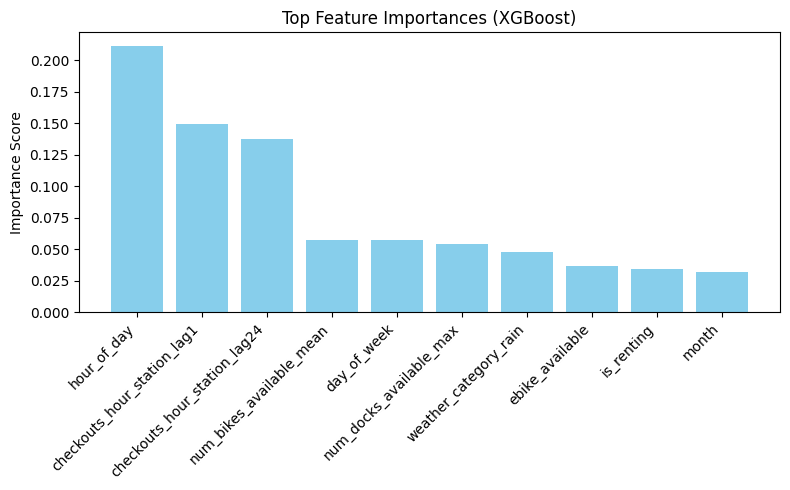

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the best XGBoost model
importances = best_model.feature_importances_
features = X_train_processed.columns  # Make sure this matches training input

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]
top_n = 10  # Show top 10 features

plt.figure(figsize=(8,5))
plt.bar(features[sorted_idx][:top_n], importances[sorted_idx][:top_n], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Importance Score")
plt.title("Top Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

**Trying a lightweight version of the dataset using only top 5 features.**

In [41]:
top_features = ['hour_of_day', 'checkouts_hour_station_lag1', 'checkouts_hour_station_lag24',
                'num_bikes_available_mean', 'day_of_week', 'num_docks_available_max', 'weather_category_rain', 'ebike_available',  'is_renting', 'month']

X_train_top = X_train_processed[top_features]
X_test_top = X_test_processed[top_features]

# Retrain your best model on this reduced set
best_model.fit(X_train_top, y_train)
y_pred_test_top = best_model.predict(X_test_top)

# Evaluate
print("Reduced feature set:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_top)):.3f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred_test_top):.3f}")
print(f"R²:   {r2_score(y_test, y_pred_test_top):.3f}")

Reduced feature set:
RMSE: 0.746
MAE:  0.619
R²:   -0.188


## **Saving the Best Model**

In [42]:
import joblib

joblib.dump(best_model, "best_bike_checkout_model.joblib")



['best_bike_checkout_model.joblib']